In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
data = pd.read_csv("LoanApplicant.csv")

In [17]:
# (1) Generate Summary Stats
sumry = np.round(data.describe().transpose(),decimals=2)
sumry

,count,mean,std,min,25%,50%,75%,max
Income,30.0,48646.00,18505.45,21240.0,37055.00,41100.0,58125.00,91100.0
Education,30.0,15.27,2.13,12.0,14.00,16.0,16.00,20.0
Age,30.0,32.80,4.63,26.0,29.00,33.0,36.00,41.0
Residence,30.0,5.93,3.98,1.0,2.25,5.0,8.00,15.0
Employ,30.0,5.50,3.66,1.0,2.00,4.0,8.00,14.0
Savings,30.0,8319.33,8550.50,0.0,1950.00,4750.0,14050.00,34000.0
Debt,30.0,3812.00,5042.51,0.0,800.00,1200.0,6600.00,22000.0
Credit cards,30.0,2.87,1.25,1.0,2.00,2.5,3.75,6.0


In [21]:
data.describe().round(2)

,Income,Education,Age,Residence,Employ,Savings,Debt,Credit cards
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,48646.00,15.27,32.80,5.93,5.50,8319.33,3812.00,2.87
std,18505.45,2.13,4.63,3.98,3.66,8550.50,5042.51,1.25
min,21240.00,12.00,26.00,1.00,1.00,0.00,0.00,1.00
25%,37055.00,14.00,29.00,2.25,2.00,1950.00,800.00,2.00
50%,41100.00,16.00,33.00,5.00,4.00,4750.00,1200.00,2.50
75%,58125.00,16.00,36.00,8.00,8.00,14050.00,6600.00,3.75
max,91100.00,20.00,41.00,15.00,14.00,34000.00,22000.00,6.00


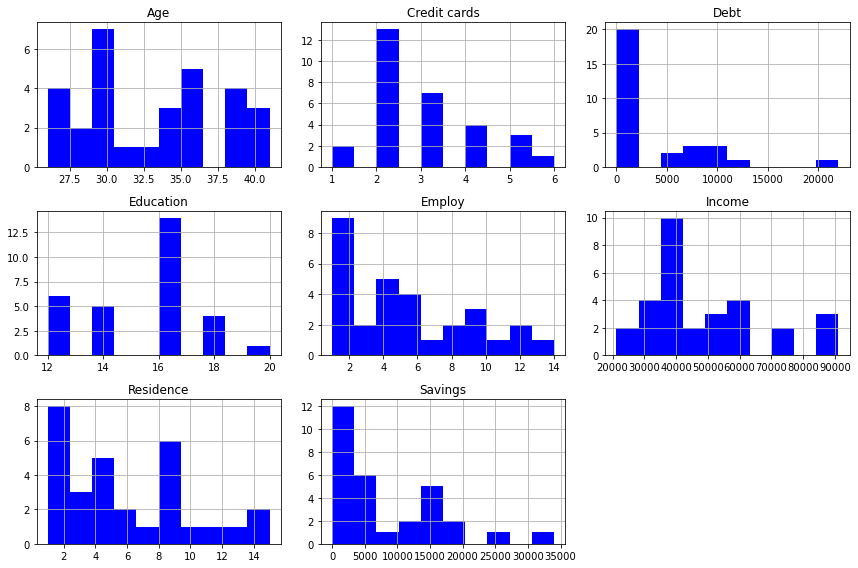

In [6]:
# (2) Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

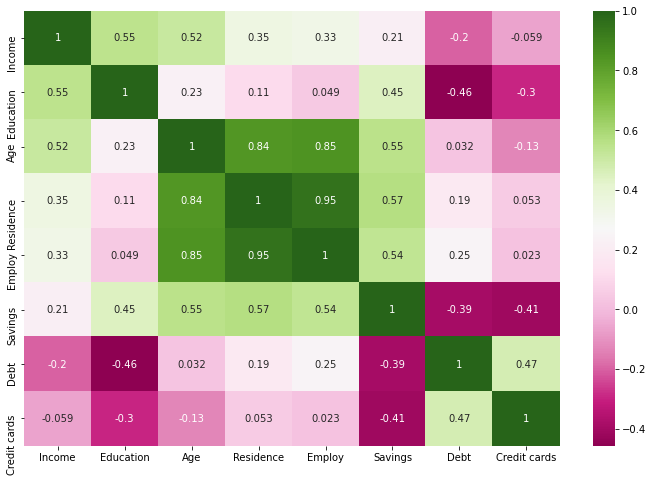

In [36]:
# (3) correlation matrices
corm = data.corr().values

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="PiYG")

In [59]:
# (4) Various Tests for PCA suitability
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

chi_square_value,p_value = calculate_bartlett_sphericity(data)
print('Chi square value: ', chi_square_value, '\n')
print('P-value: ', p_value)
if (p_value<0.05):print('The P-value is statistically significant\n')

kmo_all,kmo_model=calculate_kmo(data)

print('KMO Model: ', kmo_model)
if (kmo_model > 0.5):print('Sampling is adequate\n')

Chi square value:  173.01622444105612 

P-value:  3.2842239591607713e-23
The P-value is statistically significant

KMO Model:  0.6855653942535218
Sampling is adequate



In [42]:
# (5) Tranform data
data_std = StandardScaler().fit_transform(data) 

In [48]:
# (6) Run the PCA Method
n_components = len(data.columns)
pca = PCA(n_components).fit(data_std)

In [49]:
#eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
print('Eigenvectors (Linear Coefficients): ')
print(pd.DataFrame(eigenvectors, index=data.columns, columns=["PC"+str(i) for i in range(1, n_components+1)]))

Eigenvectors (Linear Coefficients): 
                PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
Income        0.314 -0.145  0.676 -0.347  0.241 -0.494 -0.018 -0.030
Education     0.237 -0.444  0.401  0.240 -0.622  0.357 -0.103  0.057
Age           0.484  0.135  0.004 -0.212  0.175  0.487  0.657 -0.052
Residence     0.466  0.277 -0.091  0.116  0.035  0.085 -0.487 -0.662
Employ        0.459  0.304 -0.122 -0.017  0.014  0.023 -0.368  0.739
Savings       0.404 -0.219 -0.366  0.436 -0.143 -0.568  0.348 -0.017
Debt         -0.067  0.585  0.078 -0.281 -0.681 -0.245  0.196 -0.075
Credit cards -0.123  0.452  0.468  0.703  0.195  0.022  0.158  0.058


In [62]:
#loading matrix using eigenvalues
eigenvalues = pca.explained_variance_
load_matrix = (np.sqrt(eigenvalues)*eigenvectors).round(4)
print('Loading Matrix: ')
print(pd.DataFrame(load_matrix, index=data.columns, columns=["PC"+str(i) for i in range(1, n_components+1)]))

Loading Matrix: 
                 PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8
Income        0.6015 -0.2153  0.7028 -0.2573  0.1572 -0.2050 -0.0065 -0.0062
Education     0.4540 -0.6594  0.4169  0.1780 -0.4057  0.1482 -0.0371  0.0118
Age           0.9272  0.2005  0.0042 -0.1572  0.1141  0.2021  0.2366 -0.0107
Residence     0.8927  0.4114 -0.0946  0.0860  0.0228  0.0353 -0.1754 -0.1366
Employ        0.8793  0.4515 -0.1268 -0.0126  0.0091  0.0095 -0.1325  0.1525
Savings       0.7739 -0.3252 -0.3805  0.3233 -0.0933 -0.2357  0.1253 -0.0035
Debt         -0.1284  0.8688  0.0811 -0.2084 -0.4442 -0.1017  0.0706 -0.0155
Credit cards -0.2356  0.6713  0.4865  0.5213  0.1272  0.0091  0.0569  0.0120


In [69]:
var_expln = (pca.explained_variance_ratio_*100).round(2)
eigval = (-np.sort(-eigenvalues)).round(3)
npc = 6 # display

print("Eigenvalues                      :",eigval[0:npc])
print("Eigenvalues (%Explained_Variance):",var_expln[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(var_expln[0:npc]))

Eigenvalues                      : [3.67  2.206 1.081 0.55  0.425 0.172]
Eigenvalues (%Explained_Variance): [44.34 26.65 13.06  6.64  5.14  2.08]
Eigenvalues (%Cumulative)        : [44.34 70.99 84.05 90.69 95.83 97.91]


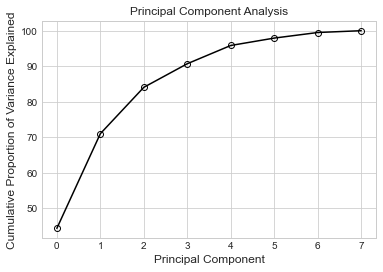

In [70]:
# pareto chart
plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

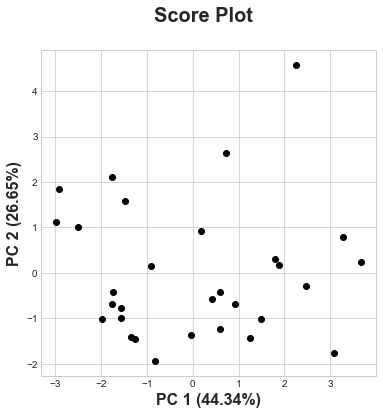

In [72]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plt.figure(figsize=(6,6))
fig.suptitle('Score Plot',fontsize=20,weight='bold')
plt.xlabel('PC 1 ('+str(var_expln[0])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)',fontsize=16,weight='bold')
new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
plt.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
#plt.show(); fig.savefig('ScorePlot.jpg')

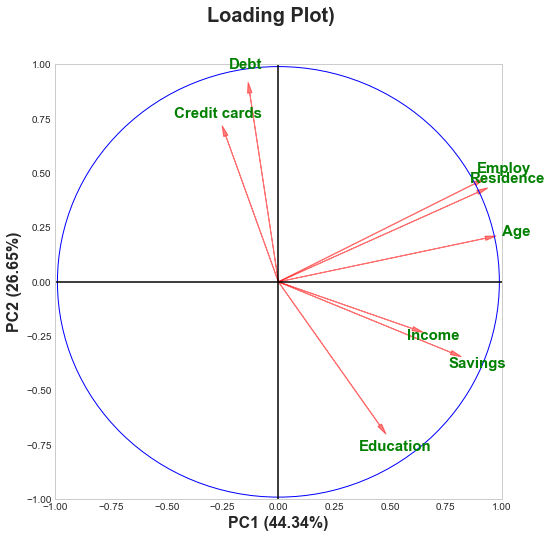

In [78]:
# Loadings Plot
p1=1; p2=2
coeff = load_matrix[:,p1-1:p2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,data.columns[i],fontsize=15,
             color='g',ha='center',va='center',weight='bold')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid();
#plt.show(); fig.savefig('Loadings.jpg')

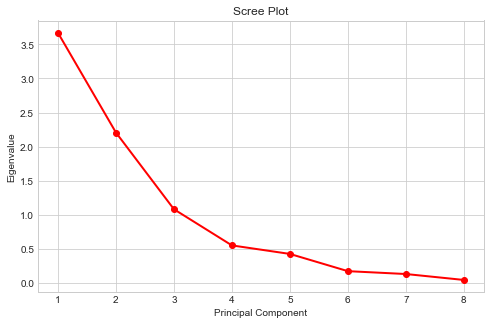

In [80]:
## scree plot, eigval from covar
num_vars= len(data.columns)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [82]:
# compute the communilaties for the selected number of PC
no_pc =2
loadings_sq = load_matrix*load_matrix #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print("\n** Communalities for",no_pc,"PCs):")
print(pd.DataFrame(communality,index=data.columns),'\n')


** Communalities for 2 PCs):
                     0
Income        0.408156
Education     0.640924
Age           0.899900
Residence     0.966163
Employ        0.977021
Savings       0.704676
Debt          0.771300
Credit cards  0.506151 

